In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## countplot

<AxesSubplot:xlabel='species', ylabel='count'>

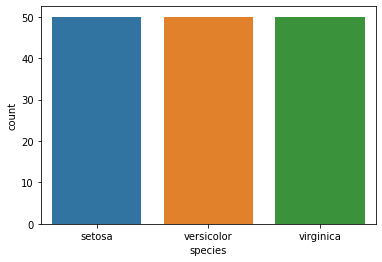

In [5]:
sb.countplot(x='species',data=df)

## scatter plot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

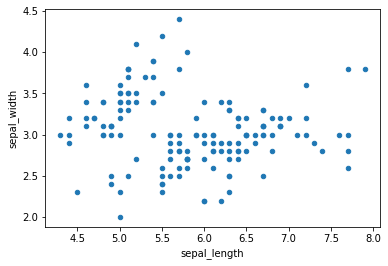

In [6]:
df.plot(kind='scatter',x='sepal_length',y='sepal_width')

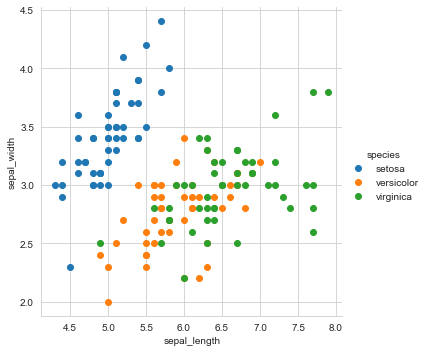

In [7]:
sb.set_style("whitegrid");
sb.FacetGrid(df, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

## pairplotting of scatter in 2Dimension

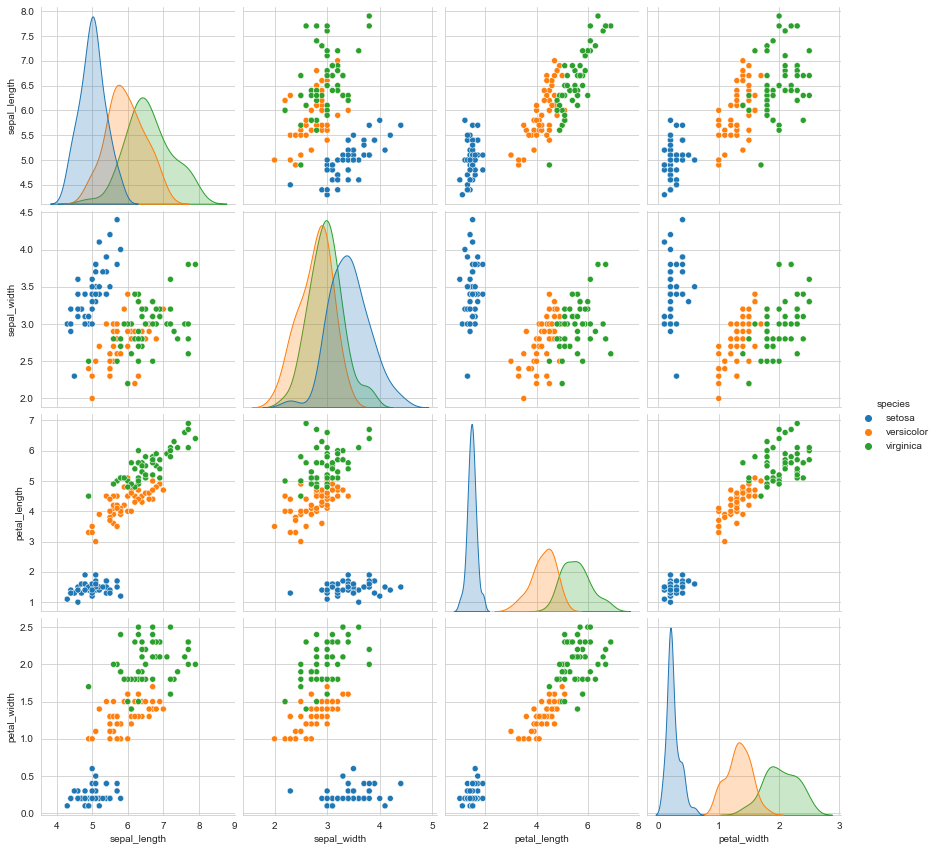

In [8]:

plt.close();
sb.set_style("whitegrid");
sb.pairplot(df, hue="species", size=3);
plt.show()

## plotting in 1Dimension

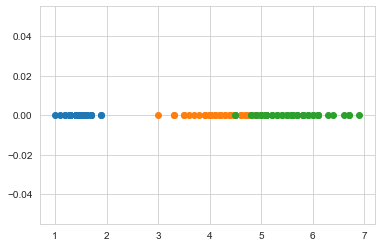

In [71]:

import numpy as np
iris_setosa = df.loc[df["species"] == "setosa"];
iris_virginica = df.loc[df["species"] == "virginica"];
iris_versicolor = df.loc[df["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()

## distrubution plot

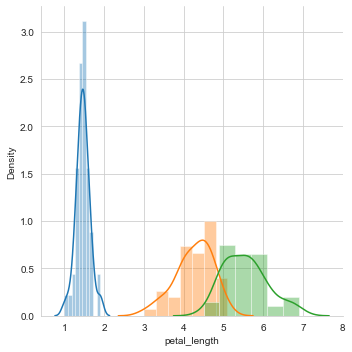

In [9]:

sb.FacetGrid(df,hue='species',size=5).map(sb.distplot,'petal_length');

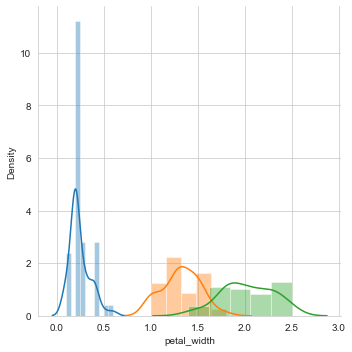

In [10]:
sb.FacetGrid(df,hue='species',size=5).map(sb.distplot,'petal_width');

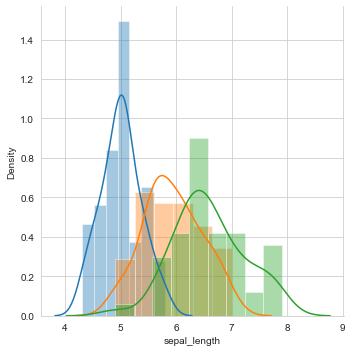

In [11]:
sb.FacetGrid(df,hue='species',size=5).map(sb.distplot,'sepal_length');

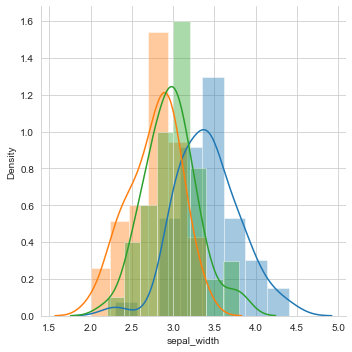

In [12]:
sb.FacetGrid(df,hue='species',size=5).map(sb.distplot,'sepal_width');

## finding mean,median,percentile,Quantile,IQR

In [ ]:
df[df.species=='setosa'].mean()

In [49]:
df[df.species=='versicolor'].mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [50]:
df[df.species=='virginica'].mean()

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

In [51]:
print(np.median(iris_setosa["petal_length"]))

1.5


In [52]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


In [53]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## boxplot

<AxesSubplot:xlabel='species', ylabel='petal_length'>

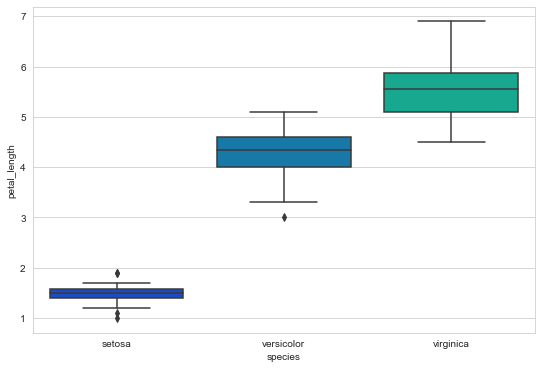

In [56]:

plt.figure(figsize=(9,6))
sb.boxplot(x='species',y='petal_length',data=df,palette='winter')

## violinplot

<AxesSubplot:xlabel='species', ylabel='petal_length'>

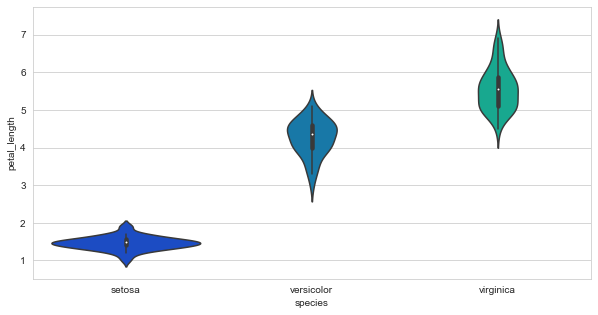

In [58]:

plt.figure(figsize=(10,5))
sb.violinplot(x='species',y='petal_length',data=df,palette='winter')

## jointplot

<Figure size 504x288 with 0 Axes>

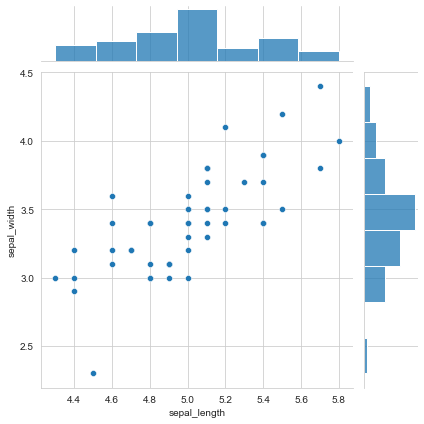

In [68]:

plt.figure(figsize=(7,4))
sb.jointplot(x='sepal_length',y='sepal_width',data=iris_setosa,palette='winter')

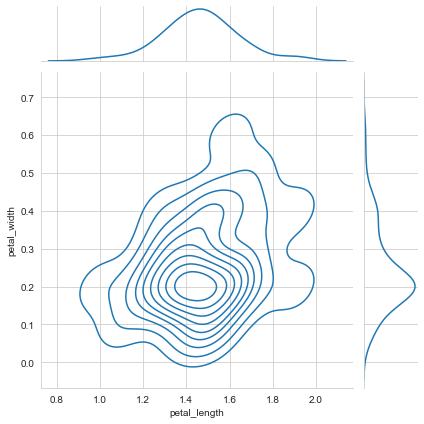

In [66]:
sb.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");

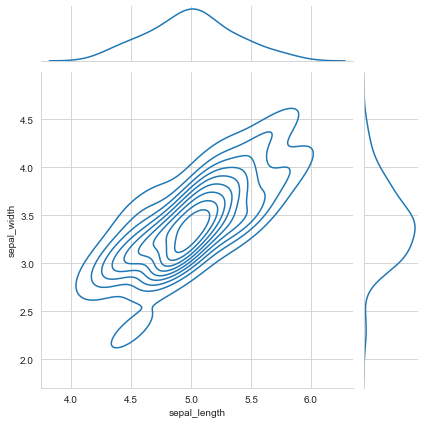

In [67]:
sb.jointplot(x='sepal_length',y='sepal_width',data=iris_setosa,kind='kde')

## swarmplot

<AxesSubplot:xlabel='species', ylabel='petal_length'>

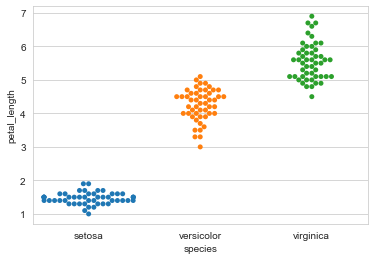

In [65]:

sb.swarmplot(x='species', y='petal_length', data=df)

## Correlation with heatmap
### color the data based on the values(heatmap)
#### corr=(Xsw-Xbar_sw)(Xsl-Xbar-sl)/Std_sw * Std_sl

<AxesSubplot:>

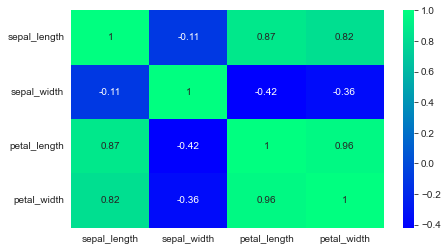

In [75]:
plt.figure(figsize=(7,4))
sb.heatmap(df.corr(),annot=True,cmap='winter') #cmap=winter,hot,cool,gray,autumn,summer,

## lineplot
### used for regression

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

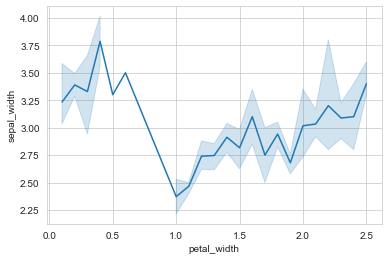

In [78]:

sb.lineplot(x='petal_width',y="sepal_width",data=df)